In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.1 Exploratory Data Analysis (EDA)


In [11]:

df = pd.read_csv("cardio_train.csv", sep=";")

df['age'] = round(df['age'] / 365)

df.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'cardio': 'cardio_disease', 'gluc': 'glucose_level', 'alco': 'alcohol_intake', 'active': 'physical_activity', 'smoke': 'smoking', 'cholesterol': 'cholesterol_level'}, inplace=True)

df.head()
df_copy = df.copy()


 Ålderskolumnen, som ursprungligen innehöll värden i dagar, har konverterats till år

Kolumnnamn ändrades för tydlighet 

In [12]:
df.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol_level,glucose_level,smoking,alcohol_intake,physical_activity,cardio_disease
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


 Hur måaga är positiva för hjärt-kärlsjukdom och hur många är negativa?

In [13]:
cardio_positiv = df["cardio_disease"].sum() 
cardio_negativ = len(df) - cardio_positiv 
print(f"Antal positiva: {cardio_positiv}")
print(f"Antal negativa: {cardio_negativ}")



Antal positiva: 34979
Antal negativa: 35021


Hur stor andel har normala, över normala och långt över normala kolestrolvärden?

In [14]:
cholesterol_level = df['cholesterol_level'].value_counts()
cholesterol_level_percentage = df['cholesterol_level'].value_counts(normalize=True) * 100


print(f"Normal: {cholesterol_level_percentage[1]:.2f}%")
print(f"Över normal: {cholesterol_level_percentage[2]:.2f}%")
print(f"Långt över normal: {cholesterol_level_percentage[3]:.2f}%")



Normal: 74.84%
Över normal: 13.64%
Långt över normal: 11.52%


 Hur stor andel röker?

In [15]:
rökare = df[df["smoking"] == 1].shape[0] 
total = df.shape[0] #
print(f"Procentandel rökare: {rökare / total:.2%}") 


Procentandel rökare: 8.81%


 Hur ser åldersfördelningen ut?

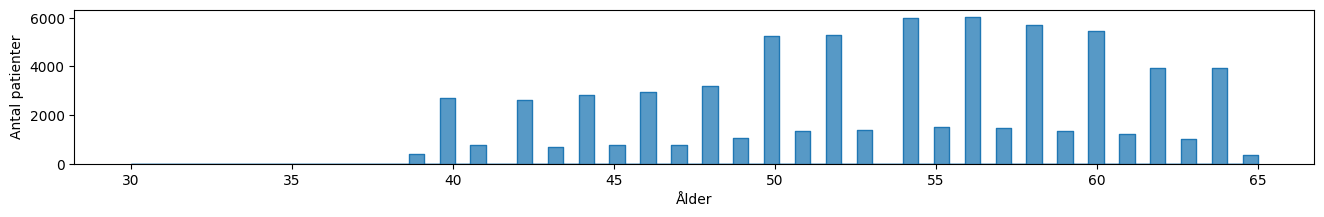

In [20]:


plt.figure(figsize=(16, 2)) 
sns.histplot(data=df, x="age", element="step") 
plt.xlabel("Ålder") 
plt.ylabel("Antal patienter") 

plt.show() 







  Hur ser viktfördelningen ut?

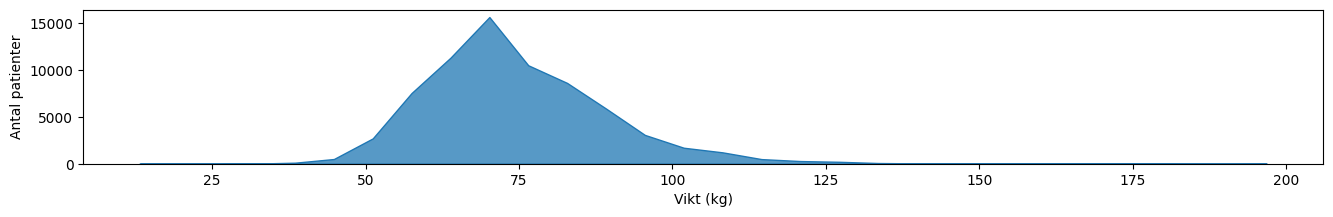

In [21]:
plt.figure(figsize=(16, 2))
sns.histplot(data=df, x="weight", element="poly", bins=30)
plt.xlabel("Vikt (kg)")
plt.ylabel("Antal patienter")
plt.show()


Hur ser längdfördelningen ut?

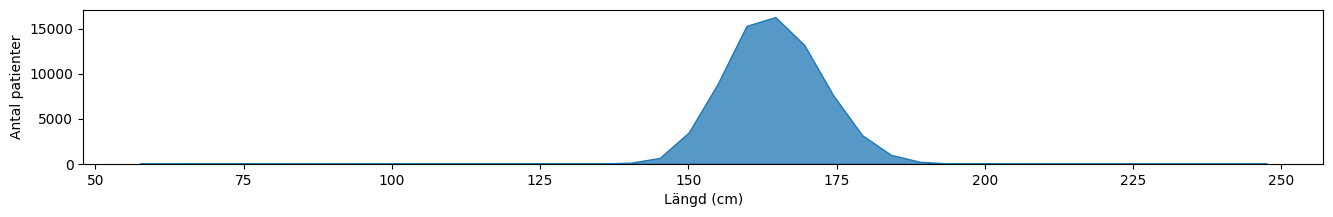

In [22]:
plt.figure(figsize=(16, 2))
sns.histplot(data=df, x="height", element="poly", bins=40)
plt.xlabel("Längd (cm)")
plt.ylabel("Antal patienter")
plt.show()


 Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom?

In [23]:

df_kopia = df.copy()

df_kopia['gender'] = df_kopia['gender'].replace({1: 'Kvinnor', 2: 'Män'})


andel_hjärtsjukdom_per_kön = df_kopia.groupby('gender')['cardio_disease'].mean() * 100


print(andel_hjärtsjukdom_per_kön)


gender
Kvinnor    49.672743
Män        50.523089
Name: cardio_disease, dtype: float64


# 1.2 Model design

Analysen påvisar att det inte finns några betydande samband mellan någon av variablerna och målvariabeln.

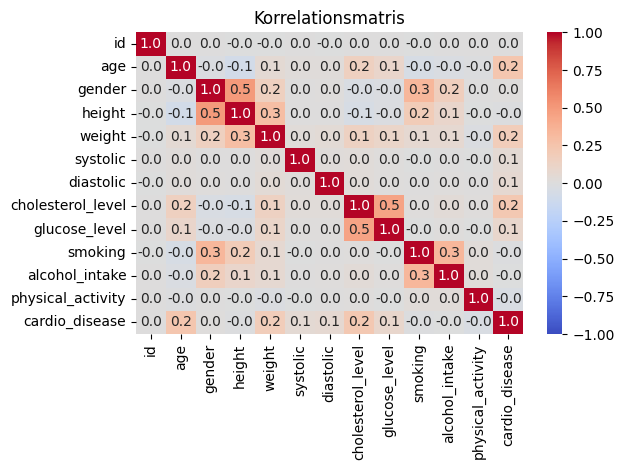

In [24]:



korrelationsmatris = df.corr()
värmekarta = sns.heatmap(korrelationsmatris, annot=True, fmt=".1f", vmin=-1, vmax=1, cmap='coolwarm')


plt.title('Korrelationsmatris')





plt.tight_layout()
plt.show()


Värden i "weight"-kolumnen som är mindre än 60 kg eller mer än 140 kg ersattes med medianvikten för hela datasetet (kallad median_weight). På samma sätt ersattes värden i "height"-kolumnen som ligger utanför intervallet 150 cm till 200 cm med medianlängden (kallad median_height).

Skapade en ny feature för Body Mass Index (BMI) baserat på vikt och längd.

In [26]:



median_weight = df['weight'].median() 
median_height = df['height'].median()


df['weight'] = np.where((df['weight'] < 60) | (df['weight'] > 140), median_weight, df['weight'])
df['height'] = np.where((df['height'] < 150) | (df['height'] > 200), median_height, df['height'])


df['bmi'] = df['weight'] / (df['height'] / 100) ** 2
df['bmi'] = round(df['bmi'], 1) 


def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi <= 24.9:
        return "Normal"
    elif 25 <= bmi <= 29.9:
        return "Overweight"
    elif 30 <= bmi <= 34.9:
        return "Obese(1)"
    elif 35 <= bmi <= 39.9:
        return "Obese(2)"
    else:
        return "Obese(3)"


df['bmi_cat'] = df['bmi'].apply(categorize_bmi)


In [27]:
df.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol_level,glucose_level,smoking,alcohol_intake,physical_activity,cardio_disease,bmi,bmi_cat
0,0,50.0,2,168.0,62.0,110,80,1,1,0,0,1,0,22.0,Normal
1,1,55.0,1,156.0,85.0,140,90,3,1,0,0,1,1,34.9,Obese(1)
2,2,52.0,1,165.0,64.0,130,70,3,1,0,0,0,1,23.5,Normal
3,3,48.0,2,169.0,82.0,150,100,1,1,0,0,1,1,28.7,Overweight
4,4,48.0,1,156.0,72.0,100,60,1,1,0,0,0,0,29.6,Overweight


Hantering av outliers för blodtryck:

Värden som betraktas som fysiologiskt osannolika (systoliskt blodtryck < 60 mmHg eller > 220 mmHg, diastoliskt blodtryck < 40 mmHg eller > 120 mmHg) ersattes med medianvärdet för respektive kolumn ("systolic" eller "diastolic").

In [28]:

df['systolic'] = df['systolic'].apply(lambda x: df['systolic'].median() if x > 220 or x < 60 else x)
df['diastolic'] = df['diastolic'].apply(lambda x: df['diastolic'].median() if x > 120 or x < 40 else x)

def categorize_blood_pressure(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return "Healthy"
    elif 120 <= systolic <= 130 and diastolic < 80:
        return "Elevated"
    elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:
        return "Stage 1 Hypertension"
    elif systolic >= 140 or diastolic >= 90:
        return "Stage 2 Hypertension"
    elif systolic > 180 or diastolic > 120:
        return "Hypertension Crisis"
    else:
        return "Invalid"

df['blood_pressure'] = df.apply(lambda x: categorize_blood_pressure(x['systolic'], x['diastolic']), axis=1)




In [29]:
df.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol_level,glucose_level,smoking,alcohol_intake,physical_activity,cardio_disease,bmi,bmi_cat,blood_pressure
0,0,50.0,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0,22.0,Normal,Stage 1 Hypertension
1,1,55.0,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1,34.9,Obese(1),Stage 2 Hypertension
2,2,52.0,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1,23.5,Normal,Elevated
3,3,48.0,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1,28.7,Overweight,Stage 2 Hypertension
4,4,48.0,1,156.0,72.0,100.0,60.0,1,1,0,0,0,0,29.6,Overweight,Healthy


## #Skapa två dataset

In [31]:

df_copy1 = df.copy()
df_copy2 = df.copy()


df_copy1.drop(['bmi', 'systolic', 'diastolic', 'height', 'weight'], axis=1, inplace=True)


df_copy1 = pd.get_dummies(df_copy1, columns=['bmi_cat', 'blood_pressure', 'gender'], drop_first=False)
df_copy1.head()


df_copy2.drop(['bmi_cat', 'blood_pressure', 'height', 'weight'], axis=1, inplace=True)


df_copy2 = pd.get_dummies(df_copy2, columns=['gender'], drop_first=False)
df_copy2.head()
df_copy1.head()


,id,age,cholesterol_level,glucose_level,smoking,alcohol_intake,physical_activity,cardio_disease,bmi_cat_Normal,bmi_cat_Obese(1),bmi_cat_Obese(2),bmi_cat_Obese(3),bmi_cat_Overweight,bmi_cat_Underweight,blood_pressure_Elevated,blood_pressure_Healthy,blood_pressure_Stage 1 Hypertension,blood_pressure_Stage 2 Hypertension,gender_1,gender_2
0,0,50.0,1,1,0,0,1,0,True,False,False,False,False,False,False,False,True,False,False,True
1,1,55.0,3,1,0,0,1,1,False,True,False,False,False,False,False,False,False,True,True,False
2,2,52.0,3,1,0,0,0,1,True,False,False,False,False,False,True,False,False,False,True,False
3,3,48.0,1,1,0,0,1,1,False,False,False,False,True,False,False,False,False,True,False,True
4,4,48.0,1,1,0,0,0,0,False,False,False,False,True,False,False,True,False,False,True,False


### 1.2.3 Utförande

Genomförde tre maskininlärningsalgoritmer: Random Forest, Logistisk Regression och K-Nearest Neighbors (KNN).
Använde GridSearchCV för att optimera hyperparametrar och utföra korsvalidering.
Delade upp data i tränings- och testset för varje algoritm och utvärderade modellernas prestanda baserat på noggrannhet och andra viktiga mått.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


X1, y1 = df_copy1.drop('cardio_disease', axis=1), df_copy1['cardio_disease']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=1)


X2, y2 = df_copy2.drop('cardio_disease', axis=1), df_copy2['cardio_disease']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)


pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))


param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200], 
    'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None] 
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)



In [34]:

grid_search.fit(X_train1, y_train1)


best_model1 = grid_search.best_estimator_
y_pred1 = best_model1.predict(X_test1)

accuracy1 = accuracy_score(y_test1, y_pred1)
report1 = classification_report(y_test1, y_pred1)


best_params1 = grid_search.best_params_


grid_search.fit(X_train2, y_train2)
best_model2 = grid_search.best_estimator_
y_pred2 = best_model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
report2 = classification_report(y_test2, y_pred2)
best_params2 = grid_search.best_params_




In [35]:
from sklearn.linear_model import LogisticRegression


param_grid_logreg = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  
    'logisticregression__penalty': ['l2'],  
    'logisticregression__solver': ['lbfgs', 'saga'],  
    'logisticregression__max_iter': [10000],  
}


pipe_logreg = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))

grid_search_logreg = GridSearchCV(pipe_logreg, param_grid_logreg, cv=10, n_jobs=-1, scoring='accuracy')


grid_search_logreg.fit(X_train1, y_train1)


best_model_logreg1 = grid_search_logreg.best_estimator_
y_pred_logreg1 = best_model_logreg1.predict(X_test1)


accuracy_logreg1 = accuracy_score(y_test1, y_pred_logreg1)
report_logreg1 = classification_report(y_test1, y_pred_logreg1)

best_params_logreg1 = grid_search_logreg.best_params_


print("First Dataset Results:")
print(f"Best Parameters: {best_params_logreg1}")
print(f"Accuracy: {accuracy_logreg1:.2f}")
print("Classification Report:")
print(report_logreg1)


grid_search_logreg.fit(X_train2, y_train2)


best_model_logreg2 = grid_search_logreg.best_estimator_
y_pred_logreg2 = best_model_logreg2.predict(X_test2)


accuracy_logreg2 = accuracy_score(y_test2, y_pred_logreg2)
report_logreg2 = classification_report(y_test2, y_pred_logreg2)


best_params_logreg2 = grid_search_logreg.best_params_


print("\nSecond Dataset Results:")
print(f"Best Parameters: {best_params_logreg2}")
print(f"Accuracy: {accuracy_logreg2:.2f}")
print("Classification Report:")
print(report_logreg2)





First Dataset Results:
Best Parameters: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 10000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71     10352
           1       0.73      0.63      0.68     10648

    accuracy                           0.70     21000
   macro avg       0.70      0.70      0.69     21000
weighted avg       0.70      0.70      0.69     21000


Second Dataset Results:
Best Parameters: {'logisticregression__C': 10, 'logisticregression__max_iter': 10000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10461
           1       0.76      0.68      0.72     10539

    accuracy                           0.73     21000
   mac

In [36]:
from sklearn.neighbors import KNeighborsClassifier


pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())


param_grid_knn = {
    'kneighborsclassifier__n_neighbors': range(1, 21),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2], 
}


grid_search_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, n_jobs=-1)


grid_search_knn.fit(X_train1, y_train1)


best_model_knn1 = grid_search_knn.best_estimator_
y_pred_knn1 = best_model_knn1.predict(X_test1)


accuracy_knn1 = accuracy_score(y_test1, y_pred_knn1)
report_knn1 = classification_report(y_test1, y_pred_knn1)

best_params_knn1 = grid_search_knn.best_params_


print("First Dataset KNN Results:")
print(f"Best Parameters: {best_params_knn1}")
print(f"Accuracy: {accuracy_knn1:.2f}")
print("Classification Report:")
print(report_knn1)


grid_search_knn.fit(X_train2, y_train2)


best_model_knn2 = grid_search_knn.best_estimator_
y_pred_knn2 = best_model_knn2.predict(X_test2)


accuracy_knn2 = accuracy_score(y_test2, y_pred_knn2)
report_knn2 = classification_report(y_test2, y_pred_knn2)

best_params_knn2 = grid_search_knn.best_params_


print("\nSecond Dataset KNN Results:")
print(f"Best Parameters: {best_params_knn2}")
print(f"Accuracy: {accuracy_knn2:.2f}")
print("Classification Report:")
print(report_knn2)



First Dataset KNN Results:
Best Parameters: {'kneighborsclassifier__n_neighbors': 20, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70     10352
           1       0.72      0.63      0.67     10648

    accuracy                           0.69     21000
   macro avg       0.69      0.69      0.69     21000
weighted avg       0.69      0.69      0.69     21000


Second Dataset KNN Results:
Best Parameters: {'kneighborsclassifier__n_neighbors': 16, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     10461
           1       0.75      0.66      0.71     10539

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
wei

In [38]:



results_list = []


def append_results(model_name, dataset_name, accuracy, best_params, classification_report):
    results_list.append({
        'Model': model_name,
        'Dataset': dataset_name,
        'Accuracy': accuracy,
        'Best Parameters': best_params,
        'Classification Report': classification_report
    })


append_results('Random Forest', 'Dataset 1', accuracy1, best_params1, report1)
append_results('Random Forest', 'Dataset 2', accuracy2, best_params2, report2)


append_results('Logistic Regression', 'Dataset 1', accuracy_logreg1, best_params_logreg1, report_logreg1)
append_results('Logistic Regression', 'Dataset 2', accuracy_logreg2, best_params_logreg2, report_logreg2)


append_results('KNN', 'Dataset 1', accuracy_knn1, best_params_knn1, report_knn1)
append_results('KNN', 'Dataset 2', accuracy_knn2, best_params_knn2, report_knn2)

results_df = pd.DataFrame(results_list)


print(results_df)

   

                 Model    Dataset  Accuracy  \
0        Random Forest  Dataset 1  0.696857   
1        Random Forest  Dataset 2  0.736905   
2  Logistic Regression  Dataset 1  0.695714   
3  Logistic Regression  Dataset 2  0.731000   
4                  KNN  Dataset 1  0.686429   
5                  KNN  Dataset 2  0.721857   

                                     Best Parameters  \
0  {'randomforestclassifier__max_depth': 10, 'ran...   
1  {'randomforestclassifier__max_depth': 10, 'ran...   
2  {'logisticregression__C': 0.1, 'logisticregres...   
3  {'logisticregression__C': 10, 'logisticregress...   
4  {'kneighborsclassifier__n_neighbors': 20, 'kne...   
5  {'kneighborsclassifier__n_neighbors': 16, 'kne...   

                               Classification Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  
4 

Analysen visade att Logistisk Regression och Random Forest båda levererade starka resultat. Logistisk Regression hade en snabbare bearbetningstid, vilket gör den lämplig för uppgifter där hastighet är viktig. Å andra sidan, om målet är att uppnå högsta möjliga prediktionsnoggrannhet, är Random Forest ett bättre val tack vare sin högre precision.

### 1.3.1 Spara modell


In [39]:
import joblib

df = pd.read_csv("cardio_train.csv", sep=";")

df['age'] = round(df['age'] / 365)

In [41]:

X, y = df.drop('cardio', axis=1), df['cardio']


X_test, _, y_test, _ = train_test_split(X, y, test_size=100, random_state=42)


X_test.to_csv('test_samples.csv', index=False)


best_model_logreg2.fit(X, y)  


joblib.dump(best_model_logreg2, 'trained_model.pkl', compress=True)
 


['trained_model.pkl']

### 1.3.2 Ladda modellen

In [42]:

test_samples = pd.read_csv('test_samples.csv')
model = joblib.load('trained_model.pkl')


predictions = model.predict(test_samples)


probabilities = model.predict_proba(test_samples)
prob_class_0 = probabilities[:, 0]
prob_class_1 = probabilities[:, 1]

prediction_df = pd.DataFrame({
    'probability_class_0': prob_class_0,
    'probability_class_1': prob_class_1,
    'prediction': predictions
})

prediction_df.to_csv('prediction.csv', index=False)
